In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [ ]:
np.random.seed(3)

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [ ]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [ ]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [ ]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 매 에포크 마다의 훈련 손실값 (loss, in training data set)
# 매 에포크 마다의 훈련 정확도 (acc, in training data set)
# 매 에포크 마다의 검증 손실값 (val_loss, in test data set)
# 매 에포크 마다의 검증 정확도 (val_acc, in test data set)

# loss: 0.3779 - accuracy: 0.8921 - val_loss: 2.4532 - val_accuracy: 0.5400
# accuracy와 val_accuracy를 비교해보면 과적합(overfitting)이 일어났음을 알 수 있다.

In [ ]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

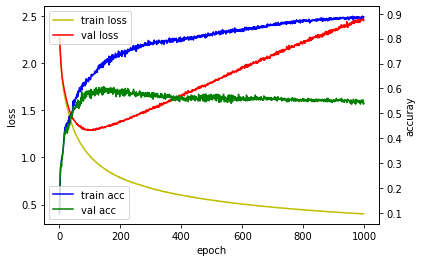

In [ ]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# epoch가 150에 가까워 졌을 때 train acc는 계속 증가하지만 val acc는 증가하지 않고 오히려 줄어드는 모습을 볼 수 있다.
# 이는 과적합이 일어났다는 증거로 조기종료를 함으로써 이를 방지할 수 있다. 하지만 그 전에 모델을 잘 짜는게 더 좋겠지...? 